In [ ]:
pip install pandas numpy scikit-learn matplotlib seaborn nltk openpyxl


In [ ]:
import pandas as pd


data = {
    'Feedback': [
        "Loved the team environment and encouragement.",
        "The internship was boring and unstructured.",
        "Amazing learning experience during the project!",
        "It was okay, could be better with more tasks.",
        "I didn’t learn anything new.",
        "I gained a lot of confidence through the tasks."
    ],
    'Sentiment': [
        "Positive", "Negative", "Positive", "Negative", "Negative", "Positive"
    ]
}


df = pd.DataFrame(data)
print(df.head())


                                          Feedback Sentiment
0    Loved the team environment and encouragement.  Positive
1      The internship was boring and unstructured.  Negative
2  Amazing learning experience during the project!  Positive
3    It was okay, could be better with more tasks.  Negative
4                     I didn’t learn anything new.  Negative


In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words("english"))

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+", '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text

df['cleaned_feedback'] = df['Feedback'].apply(clean_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df['label'] = df['Sentiment'].apply(lambda x: 1 if x.lower() == 'positive' else 0)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['cleaned_feedback'])
y = df['label']


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

Classification Report:

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


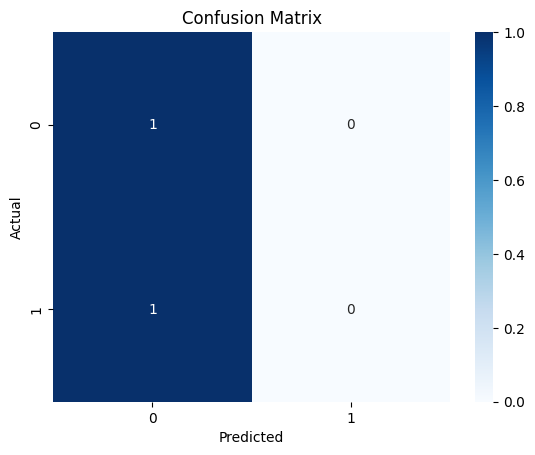

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

print("Classification Report:\n")
print(classification_report(y_test, y_pred))


conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
